In [63]:
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [64]:
X = digits.data
y = digits.target

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

In [66]:
df = pd.DataFrame(data = y,columns = ['targets'])
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [67]:
X.shape

(1797, 64)

In [68]:
y.shape

(1797,)

In [69]:
digits.images.shape

(1797, 8, 8)

In [70]:
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

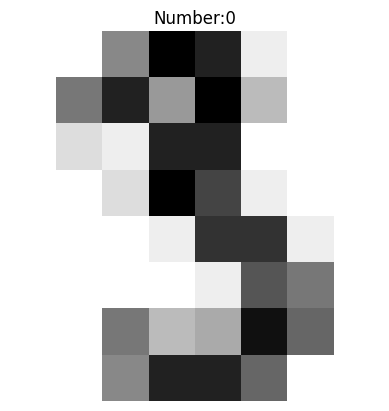

In [71]:
plt.imshow(digits.images[3], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number:'+ str(y[0]))
None

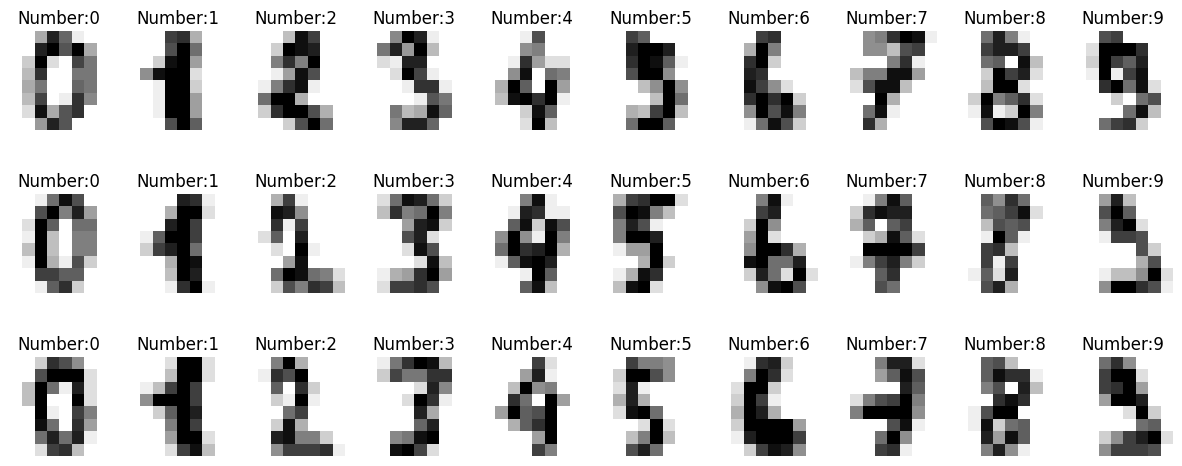

In [72]:
figure,axes = plt.subplots(3,10,figsize = (15,6))
for ax,image,number in zip(axes.ravel(),digits.images,y):
    ax.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title('Number:'+str(number))

In [73]:
image = digits.images[3]
print('original image data=')
print(image)
print()

image_flattened = image.ravel()
print('flattened image = ')
print(image_flattened)
print()

original image data=
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]

flattened image = 
[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]



In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=99, stratify = y)

In [75]:
X_train.shape

(1203, 64)

In [76]:
X_test.shape

(594, 64)

In [77]:
y_train.shape

(1203,)

In [78]:
y_test.shape

(594,)

# BERNOULLI NAIVE BAYES

In [79]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(X_train , y_train)
y_pred1 = ber.predict(X_test)

In [80]:
acc1 = accuracy_score(y_test,y_pred1)*100
print('Accuracy of the model: {0}%'.format(acc1))

Accuracy of the model: 83.16498316498317%


In [81]:
report = classification_report(y_test, y_pred1)
print("\nClassification Report for Bernoulli Naive Bayes:\n", report)


Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.69      0.57      0.62        60
           2       0.84      0.83      0.84        59
           3       0.90      0.75      0.82        60
           4       0.93      0.92      0.92        60
           5       0.90      0.72      0.80        60
           6       0.98      0.93      0.96        60
           7       0.83      1.00      0.91        59
           8       0.66      0.79      0.72        58
           9       0.70      0.86      0.77        59

    accuracy                           0.83       594
   macro avg       0.84      0.83      0.83       594
weighted avg       0.84      0.83      0.83       594



# GAUSSIAN NAIVE BAYES

In [82]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train , y_train)
y_pred2 = gaus.predict(X_test)

In [83]:
acc2 = accuracy_score(y_test,y_pred2)*100
print('Accuracy of the model: {0}%'.format(acc2))  

Accuracy of the model: 82.32323232323232%


In [84]:
report = classification_report(y_test, y_pred2)
print("\nClassification Report for Gaussian Naive Bayes:\n", report)


Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.63      0.93      0.75        60
           2       0.91      0.71      0.80        59
           3       0.95      0.68      0.80        60
           4       0.94      0.77      0.84        60
           5       0.90      0.90      0.90        60
           6       0.95      0.98      0.97        60
           7       0.72      1.00      0.84        59
           8       0.55      0.66      0.60        58
           9       1.00      0.63      0.77        59

    accuracy                           0.82       594
   macro avg       0.86      0.82      0.82       594
weighted avg       0.86      0.82      0.83       594



# MULTINOMIAL NAIVE BAYES

In [85]:
from sklearn.naive_bayes import MultinomialNB
mul = MultinomialNB()
mul.fit(X_train , y_train)
y_pred3 = mul.predict(X_test)

In [86]:
acc3 = accuracy_score(y_test,y_pred3)*100
print('Accuracy of the model: {0}%'.format(acc3))

Accuracy of the model: 88.72053872053873%


In [87]:
report = classification_report(y_test, y_pred3)
print("\nClassification Report for Multinomial Naive Bayes:\n", report)


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.93      0.72      0.81        60
           2       0.91      0.90      0.91        59
           3       1.00      0.82      0.90        60
           4       0.96      0.92      0.94        60
           5       0.94      0.82      0.87        60
           6       0.97      0.98      0.98        60
           7       0.86      1.00      0.92        59
           8       0.72      0.86      0.79        58
           9       0.70      0.88      0.78        59

    accuracy                           0.89       594
   macro avg       0.90      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594



In [88]:
models = pd.DataFrame({
    'Model': ['Bernoulli NB' , 'Gaussian NB', 'MultinomialNB'],
    'Score': [acc1, acc2, acc3]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,MultinomialNB,88.720539
0,Bernoulli NB,83.164983
1,Gaussian NB,82.323232


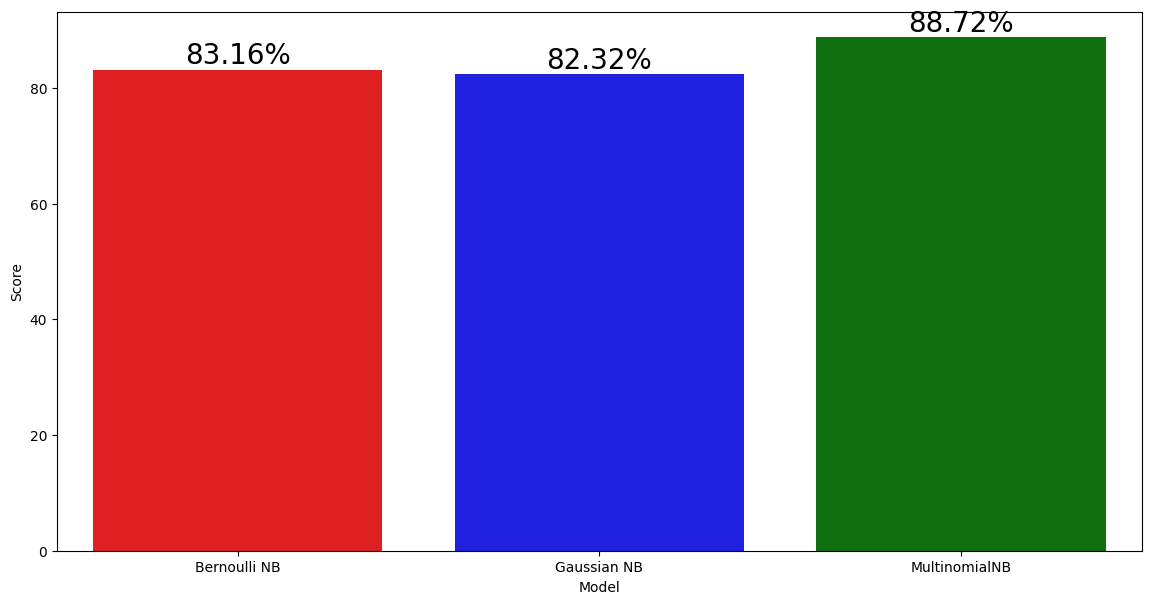

In [89]:
color = ['red', 'blue', 'green']
plt.figure(figsize=(14,7))
ax = sns.barplot(x=models['Model'], y=models['Score'], palette=color)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

# GAUSSIAN NAIVE BAYES FROM SCRATCH

In [90]:
e=0.01
class NaiveBayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
     
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var + e)) 
        denominator = np.sqrt(2 * np.pi * var + e) 
        return numerator / denominator
    
def accuracy(Y_test, Y_pred):
        accuracy = (np.sum(Y_test == Y_pred) / len(Y_test))
        return (accuracy)

In [91]:
nb = NaiveBayes()
nb.fit(X_train , y_train)
y_pred4 = nb.predict(X_test)

In [92]:
acc_gnb = (accuracy(y_test,y_pred4))*100
print('Accuracy of the model: {0}%'.format(acc_gnb))

Accuracy of the model: 89.22558922558923%


In [93]:
report = classification_report(y_test, y_pred4)
print("\nClassification Report for Gaussian Naive Bayes:\n", report)


Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.87      0.80      0.83        60
           2       0.94      0.85      0.89        59
           3       0.94      0.85      0.89        60
           4       0.93      0.88      0.91        60
           5       0.95      0.92      0.93        60
           6       1.00      0.98      0.99        60
           7       0.79      1.00      0.88        59
           8       0.69      0.86      0.77        58
           9       0.89      0.81      0.85        59

    accuracy                           0.89       594
   macro avg       0.90      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594



# MULTINOMIAL NAIVE BAYES FROM SCRATCH

In [94]:
from collections import defaultdict

class MultinomialNaiveBayes:

    def __init__(self):
        self.classes = None
        self.class_probabilities = None
        self.feature_probabilities = None

    def fit(self, X_train, y_train):
        self.classes = set(y_train)
        self.class_probabilities = defaultdict(int)
        feature_counts = {c: defaultdict(int) for c in self.classes}
        feature_totals = defaultdict(int)

        for i, c in enumerate(y_train):
            self.class_probabilities[c] += 1
            for j in range(X_train.shape[1]):
                feature_counts[c][j] += X_train[i, j]
                feature_totals[j] += X_train[i, j]

        self.class_probabilities = {
            c: count / len(y_train) for c, count in self.class_probabilities.items()
        }

        self.feature_probabilities = {
            c: {
                j: (count + 1) / (feature_totals[j] + X_train.shape[1])
                for j, count in feature_counts[c].items()
            }
            for c in self.classes
        }

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            class_scores = {}
            for c in self.classes:
                score = np.log(self.class_probabilities[c])
                for j in range(X_test.shape[1]):
                    score += x[j] * np.log(self.feature_probabilities[c][j])
                class_scores[c] = score
            y_pred.append(max(class_scores, key=class_scores.get))
        return y_pred

In [95]:
clf = MultinomialNaiveBayes()
clf.fit(X_train , y_train)
y_pred5 = clf.predict(X_test)

In [96]:
acc_mnb = accuracy_score(y_test,y_pred5)*100
print('Accuracy of the model from scratch: {0}%'.format(acc_mnb))

Accuracy of the model from scratch: 87.87878787878788%


In [97]:
report = classification_report(y_test, y_pred5)
print("\nClassification Report for Multinomial Naive Bayes:\n", report)


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.95      0.63      0.76        60
           2       0.94      0.85      0.89        59
           3       0.98      0.82      0.89        60
           4       0.96      0.92      0.94        60
           5       0.94      0.78      0.85        60
           6       0.98      0.98      0.98        60
           7       0.89      0.98      0.94        59
           8       0.64      0.97      0.77        58
           9       0.72      0.88      0.79        59

    accuracy                           0.88       594
   macro avg       0.90      0.88      0.88       594
weighted avg       0.90      0.88      0.88       594



# BERNOULLI NAIVE BAYES FROM SCRATCH

In [114]:
from collections import defaultdict

class BernoulliNaiveBayes:
    
    def __init__(self):
        self.classes = None
        self.class_probabilities = None
        self.feature_probabilities = None

    def fit(self, X_train, y_train, alpha=5.0):
        self.classes = set(y_train)
        self.class_probabilities = defaultdict(int)
        feature_counts = {c: defaultdict(int) for c in self.classes}
        feature_totals = defaultdict(int)

        for i, c in enumerate(y_train):
            self.class_probabilities[c] += 1
            nonzero_indices = np.nonzero(X_train[i])[0]
            for j in nonzero_indices:
                feature_counts[c][j] += 1
                feature_totals[j] += 1

        num_classes = len(self.classes)
        num_features = X_train.shape[1]

        self.class_probabilities = {
            c: (count + alpha) / (len(y_train) + alpha * num_classes)
            for c, count in self.class_probabilities.items()
        }

        self.feature_probabilities = {
            c: {
                j: (feature_counts[c][j] + alpha) / (feature_totals[j] + 2 * alpha)
                for j in range(num_features)
            }
            for c in self.classes
        }

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            class_scores = {}
            for c in self.classes:
                score = np.log(self.class_probabilities[c])
                for j in range(len(x)):
                    if x[j] == 1:
                        score += np.log(self.feature_probabilities[c][j])
                    else:
                        score += np.log(1 - self.feature_probabilities[c][j])
                class_scores[c] = score
            y_pred.append(max(class_scores, key=class_scores.get))
        return y_pred

In [115]:
nb = BernoulliNaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

acc_bnb = accuracy_score(y_test,predictions)*100
print('Accuracy of the model from scratch: {0}%'.format(acc_bnb))

Accuracy of the model from scratch: 13.131313131313133%


In [107]:
report = classification_report(y_test, predictions)
print("\nClassification Report for Bernoulli Naive Bayes:\n", report)


Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.09      0.20      0.12        59
           1       0.11      0.52      0.18        60
           2       0.17      0.02      0.03        59
           3       0.20      0.20      0.20        60
           4       0.00      0.00      0.00        60
           5       0.24      0.22      0.23        60
           6       0.50      0.05      0.09        60
           7       0.33      0.05      0.09        59
           8       0.21      0.07      0.10        58
           9       0.14      0.05      0.08        59

    accuracy                           0.14       594
   macro avg       0.20      0.14      0.11       594
weighted avg       0.20      0.14      0.11       594



In [103]:
model = pd.DataFrame({
    'Model': ['Gaussian NB' , 'Bernoulli NB', 'MultinomialNB'],
    'Score': [acc_gnb, acc_bnb, acc_mnb]})
model.sort_values(by='Score', ascending=False)

,Model,Score
0,Gaussian NB,89.225589
2,MultinomialNB,87.878788
1,Bernoulli NB,13.804714


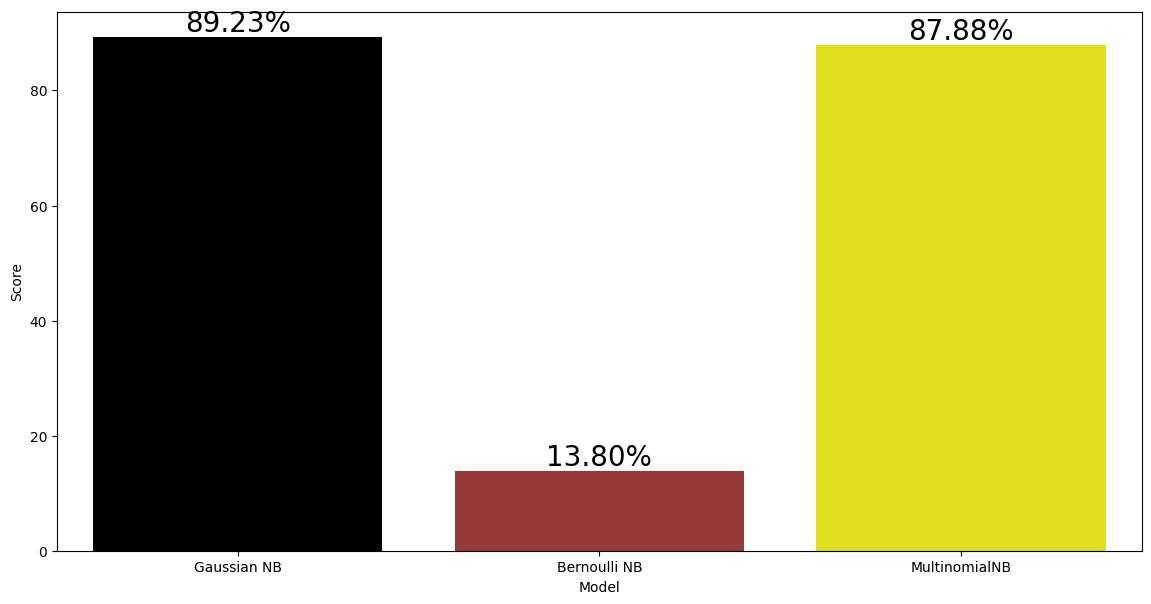

In [104]:
color = ['black', 'brown', 'yellow']
plt.figure(figsize=(14,7))
ax = sns.barplot(x=model['Model'], y=model['Score'], palette=color)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()